# Families distribution report

In this notebook the distribution of the malware family over time is analyzed.
It's shown that:
- Most of the data samples were firstly submitted near 2022, except two small peaks in 2018 and 2013
- Using a timespan of 1 year, 2018 is the first year in terms of number of discovered families. 
    As the timespan increases, the evidence of a higher change in new discovered families is clear in the second half of the collected data.

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [14]:
# Get the merged malware data
df = pd.read_csv("vt_reports/merge.csv")
df.head()

,sha256,first_submission_date,family
0,98f8e26e12b978102fa39c197f300ebe5fe535617737d5...,1630575593,tnega
1,7b2999ffadbc3b5b5c5e94145ca4e2f8de66ac1e3ddd52...,1629375559,quasar
2,e7569d494fe00be04ef6c9fcc5e54720c0df623b08e79d...,1362057319,pasta
3,1ed60c04f572b6acb9f64c31db55ef5c6b5465bd4da1eb...,1630624233,cjishu
4,4c4aaff20a57213d9a786e56ad22f1eaa94694a2f1042b...,1592186154,kingsoft


In [44]:
# Convert the date to datetime
df1 = df.copy()
df1['first_submission_date'] = df['first_submission_date'].apply(
    lambda t: pd.to_datetime(t, unit='s')
)

<Figure size 1500x1000 with 0 Axes>

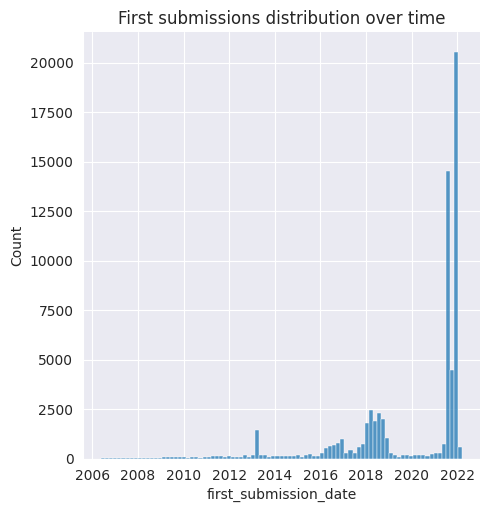

In [6]:
# Plot the distribution of first submissions over time
plt.figure(figsize=(15, 10))
dist_plot = sns.displot(df1, x='first_submission_date')
plt.title("First submissions distribution over time")
plt.show()

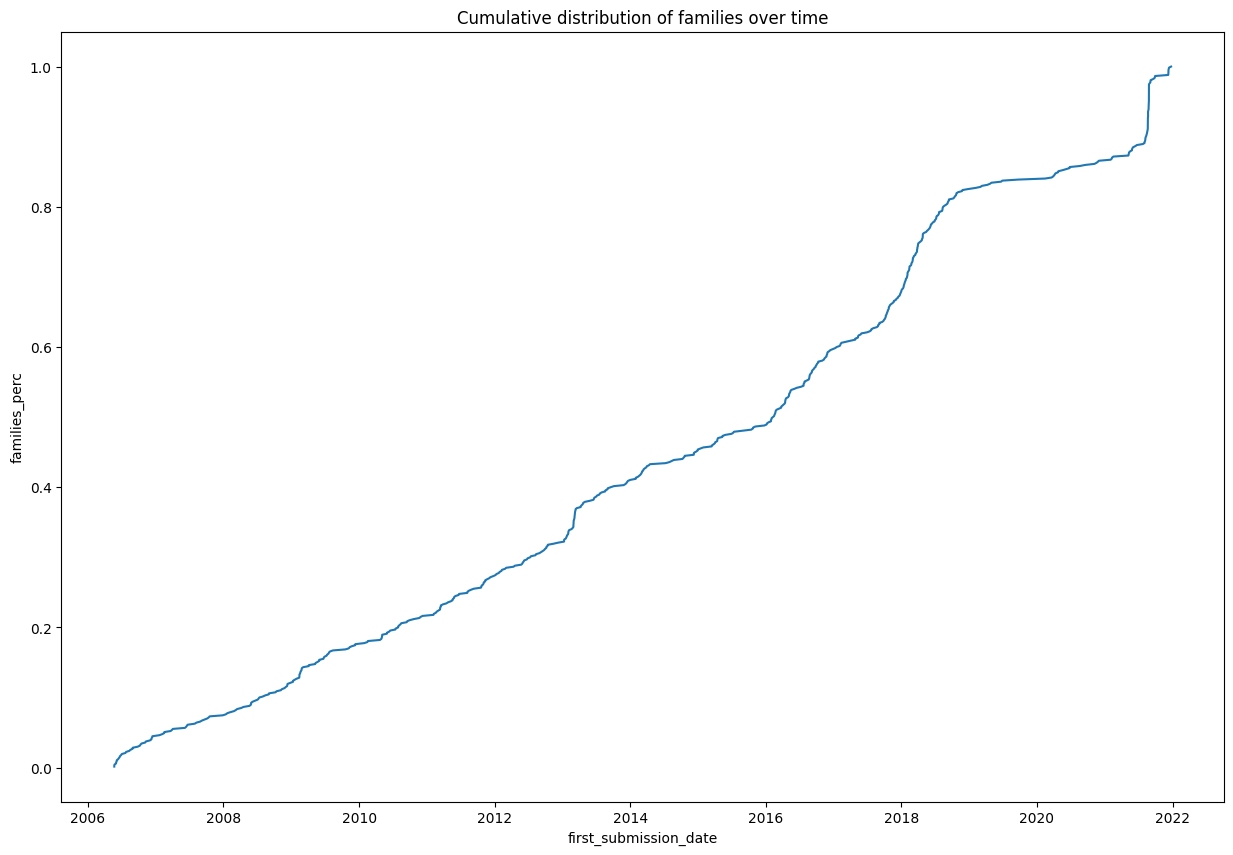

In [14]:
cumulative_df = pd.DataFrame(df1[["family", "first_submission_date"]], index=None)

# Group by the rows by the malware family, minimizing the first submission date
cumulative_df = cumulative_df.groupby(by=["family"]).min()

n = len(cumulative_df)
# For each timestamp, get the number of families previously discovered
cumulative_df['families_perc'] = cumulative_df['first_submission_date'].apply(
    lambda t: len(cumulative_df[cumulative_df['first_submission_date'] <= t]) / n
)

# Sort the submission date in ascending order
cumulative_df = cumulative_df.sort_values(by="first_submission_date")

# Plot the distribution of first submissions over time
plt.figure(figsize=(15, 10))
plt.title("Cumulative distribution of families over time")
sns.lineplot(cumulative_df, x="first_submission_date", y="families_perc")
plt.show()

In [33]:
df_len = len(df)

families = df["family"].unique()
family_variances = np.zeros(len(families))

for i, family in enumerate(families):
    # Start with an array of 0's and then set 1 to those indexes where 
    # the family is the iteration one.
    bitmask = np.zeros(df_len)
    indexes = df[df["family"] == family].index
    bitmask[indexes] = 1
    # Test
    assert np.all(bitmask[indexes] == 1)
    assert np.all(bitmask[np.array([k for k in range(df_len) if k not in indexes])] == 0)

    family_variances[i] = np.var(bitmask, ddof=1)

print(family_variances)

[0.00149033 0.00149033 0.00149033 0.00149033 0.00149033 0.00149033
 0.00149033 0.00149033 0.00149033 0.00149033 0.00149033 0.00149033
 0.00149033 0.00149033 0.00149033 0.00149033 0.00149033 0.00149033
 0.00149033 0.00149033 0.00149033 0.00149033 0.00149033 0.00149033
 0.00149033 0.00149033 0.00149033 0.00149033 0.00149033 0.00149033
 0.00149033 0.00149033 0.00149033 0.00149033 0.00149033 0.00149033
 0.00149033 0.00149033 0.00149033 0.00149033 0.00149033 0.00149033
 0.00149033 0.00149033 0.00149033 0.00149033 0.00149033 0.00149033
 0.00149033 0.00149033 0.00149033 0.00149033 0.00149033 0.00149033
 0.00149033 0.00149033 0.00149033 0.00149033 0.00149033 0.00149033
 0.00149033 0.00149033 0.00149033 0.00149033 0.00149033 0.00149033
 0.00149033 0.00149033 0.00149033 0.00149033 0.00149033 0.00149033
 0.00149033 0.00149033 0.00149033 0.00149033 0.00149033 0.00149033
 0.00149033 0.00149033 0.00149033 0.00149033 0.00149033 0.00149033
 0.00149033 0.00149033 0.00149033 0.00149033 0.00149033 0.0014

In [59]:
fsd = "first_submission_date"

df2 = df1.copy()
df2[fsd] = df2[fsd].apply(lambda d: d.strftime('%Y-%m-%d'))

date_min = df2[fsd].min()
date_max = df2[fsd].max()

days_range = [d.strftime('%Y-%m-%d') for d in
              pd.date_range(start=date_min, end=date_max, freq='D').tolist()]

families = df["family"].unique()

family_variances = [np.var([len(df2[
                                    (df2["family"] == family) &
                                    (df2[fsd] == day)
                                    ])
                            for day in days_range])
                    for family in families]
print(family_variances)

#     # Test
#     assert np.all(bitmask[indexes] == 1)
#     assert np.all(bitmask[np.array([k for k in range(df_len) if k not in indexes])] == 0)
#     
#     family_variances[i] = np.var(bitmask, ddof=1)
#     
# print(family_variances)


KeyboardInterrupt



In [96]:
fsd = "first_submission_date"

date_min = df1[fsd].min()
date_max = df1[fsd].max()

df2 = df1.copy()

df2[fsd] = df2[fsd].apply(lambda d: d.strftime('%Y-%m-%d'))

days_range = [d.strftime('%Y-%m-%d') for d in
              pd.date_range(start=date_min, end=date_max, freq='D').tolist()]

families = df2["family"].unique()

df_group_by = pd.DataFrame(df2.groupby(["family", fsd]).size().reset_index(name='count'))

family_variances = []
for family in families:
    
    days_count = np.zeros((date_max - date_min).days + 1)
    days = df_group_by[df_group_by["family"] == family][fsd].tolist()
    off = [(pd.Timestamp(day) - date_min).days for day in days]
    days_count[off] = 1
    family_variances.append(np.var(days_count))
    
df_variances = pd.DataFrame({"family": families, "variance": family_variances})

df_variances = df_variances.sort_values(by="variance")

df_variances['families_perc'] = df_variances["variance"].apply(
    lambda t: len(df_variances[df_variances["variance"] <= t]) / len(families)
)

df_variances.head()

,family,variance,families_perc
649,balrok,0.000346,0.001493
667,picsys,0.000346,0.005970
644,qqpass,0.000346,0.005970
664,griptolo,0.000346,0.005970
526,stone,0.000519,0.020896


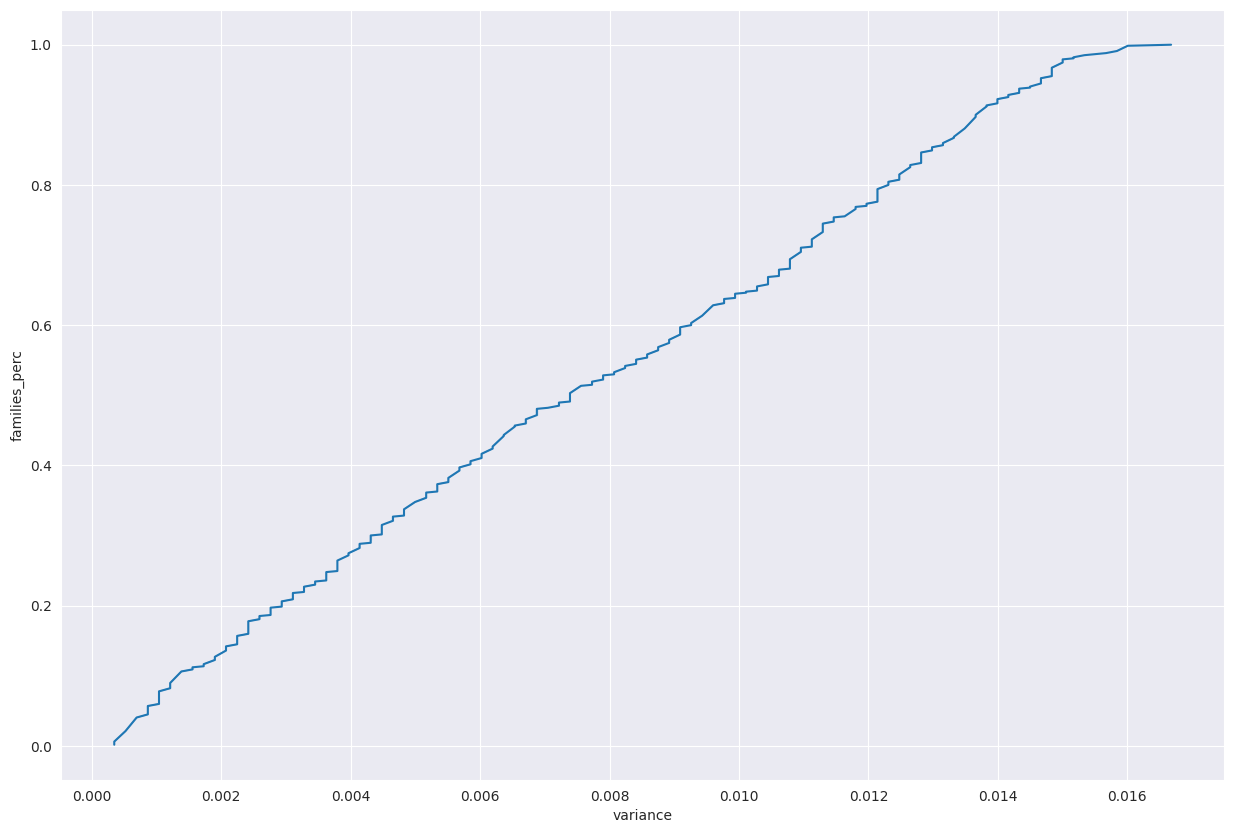

In [97]:
# Plot the distribution of first submissions over time
plt.figure(figsize=(15, 10))
sns.lineplot(df_variances, x="variance", y="families_perc")
plt.show()

In [79]:
timestamp_to_datetime = lambda t: pd.to_datetime(t, unit='s')
datetime_to_timestamp = lambda t: t.timestamp()


def lin_reg_fit(df_split):
    df_split["first_submission_date"] = df_split["first_submission_date"].apply(
        lambda t: datetime_to_timestamp(t)
    );
    X, y = df_split[["first_submission_date"]].to_numpy(), df_split["families_perc"].to_numpy()
    return LinearRegression().fit(X, y), X, y


def plot_reg_pair(reg_data, j):
    fig, ax = plt.subplots()
    plt.title("Window-based linear regression")

    for i in range(len(reg_data)):
        reg, X, _ = reg_data[i]
        X1 = timestamp_to_datetime(X.ravel())
        df1 = pd.DataFrame({"first_submission_date": X1, "families_perc": reg.predict(X)})
        sns.scatterplot(cumulative_df, x="first_submission_date", y="families_perc")
        sns.lineplot(df1, x="first_submission_date", y="families_perc", linewidth=3 if i == j else 1, ax=ax)
    plt.show()

In [17]:
from sklearn.linear_model import LinearRegression

min_datetime = timestamp_to_datetime(df["first_submission_date"].min())
max_datetime = timestamp_to_datetime(df["first_submission_date"].max())

total_duration = max_datetime - min_datetime


def window_linear_regression(n_windows=2):
    window_size = total_duration / n_windows

    windows = [i * window_size for i in range(n_windows + 1)]
    splits = [cumulative_df[
                  (cumulative_df["first_submission_date"] - min_datetime >= windows[i - 1]) &
                  (cumulative_df["first_submission_date"] - min_datetime < windows[i])]
              for i in range(1, len(windows))]

    regressions_data = []
    slopes = []
    for split in splits:
        regression_data = lin_reg_fit(split)
        regressions_data.append(regression_data)
        slopes.append(regression_data[0].coef_[0])

    index_max = np.argmax(slopes)
    plot_reg_pair(regressions_data, index_max)

In [18]:
%matplotlib inline
from ipywidgets import *

n_windows = max_datetime.year - min_datetime.year
interact(window_linear_regression, w=(2, n_windows, 1))

interactive(children=(IntSlider(value=2, description='n_windows', max=6, min=-2), Output()), _dom_classes=('wi…

<function __main__.window_linear_regression(n_windows=2)>